# 1. Import Library

In [30]:
# nltk untuk nlp
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Import Library 
import pandas as pd

# Pickle untuk save model
import pickle

# Sastrawi untuk stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Preprocessing (sklearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Import Dataset

In [7]:
# Melakukan perulangan untuk import data
df = pd.read_csv('./data/indo_email.csv')

# 3. Understanding Dataset

In [8]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  2636 non-null   object
 1   Pesan     2636 non-null   object
dtypes: object(2)
memory usage: 41.3+ KB


In [9]:
# Menampilkan 5 data teratas
df.head()

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [49]:
# Menampilkan 5 data terbawah
df.tail()

,Kategori,Pesan
2631,ham,ingat halo semua vince minta kirim ikut ingat ...
2632,ham,re argentina power gas market modeling oke jul...
2633,ham,re program enron stanford stinson hebat nanti ...
2634,ham,tuju tinjau roberts jr michael a saran ulas ki...
2635,ham,re seminar bollerslev sangat bagus terima kasi...


In [10]:
# Menampilkan jumlah persebaran data pada kolom 'Email Type'
df['Kategori'].value_counts()

Kategori
spam    1368
ham     1268
Name: count, dtype: int64

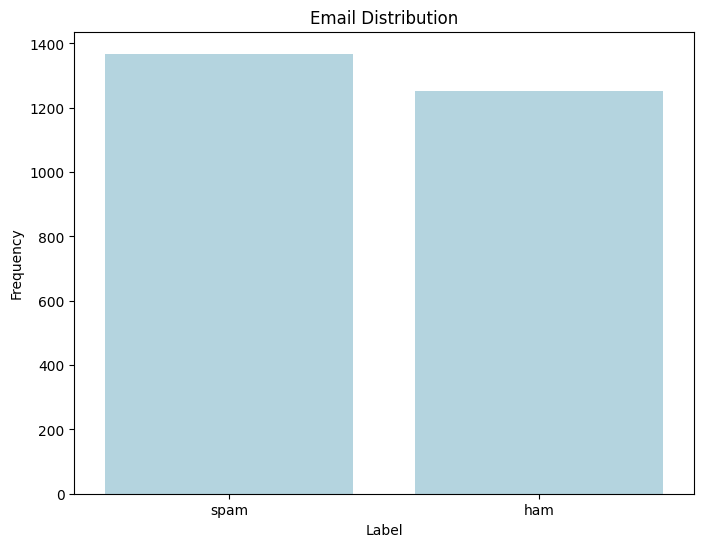

In [161]:
# Plotting persebaran data pada kolom 'Email Type'
label_counts = df['Kategori'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, color='lightblue')
plt.title('Email Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(2636, 2)

# 4. Cleaning Data

### Data Cleaning

#### Cek Data Duplikat

In [13]:
# Mengecek duplikasi data
df.duplicated().sum()
print(f"Jumlah data duplikat: {df.duplicated().sum()} data")

Jumlah data duplikat: 16 data


In [14]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [15]:
# Cross check data duplikat
df.duplicated().sum()
print(f"Jumlah data duplikat: {df.duplicated().sum()} data")

Jumlah data duplikat: 0 data


#### Cek Nilai Null

In [162]:
# Mengecek nilai null pada dataset
print(f"Jumlah nilai null adalah: {df.isna().sum().sum()} data")

Jumlah nilai null adalah: 0 data


In [19]:
df.shape

(2620, 2)

### Stopwords Removal

In [24]:
sample_data = "Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi kami untuk informasi lebih lanjut."

In [41]:
# Melakukan stopword removal menggunakan Sastrawi
def stopword_removal(text):
    stop_factory = StopWordRemoverFactory()
    stopword = stop_factory.get_stop_words()
    words = text.split()
    filtered_words = [word for word in words if word not in stopword]
    return ' '.join(filtered_words)

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {stopword_removal(sample_data)}")

Sebelum : Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi kami untuk informasi lebih lanjut.
Sesudah : Anda memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi informasi lebih lanjut.


### Case Folding

In [37]:
# Melakukan proses case folding
def case_folding(text):
    return text.lower()

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {case_folding(sample_data)}")

Sebelum : Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi kami untuk informasi lebih lanjut.
Sesudah : anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. silakan hubungi kami untuk informasi lebih lanjut.


### Stemming

In [42]:
# Melakukan proses stemming menggunakan Sastrawi
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {stemming(sample_data)}")

Sebelum : Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi kami untuk informasi lebih lanjut.
Sesudah : anda telah menang hadiah uang tunai besar 100 juta rupiah sila hubung kami untuk informasi lebih lanjut


### Remove Symbol

In [43]:
# Menghapus karakter khusus
def remove_special_character(text):
    return ''.join(e for e in text if e.isalnum() or e.isspace())

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {remove_special_character(sample_data)}")

Sebelum : Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi kami untuk informasi lebih lanjut.
Sesudah : Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah Silakan hubungi kami untuk informasi lebih lanjut


### Tokenization

In [44]:
# Melakukan tokenisasi
def tokenization(text):
    return word_tokenize(text)

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {tokenization(sample_data)}")

Sebelum : Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi kami untuk informasi lebih lanjut.
Sesudah : ['Anda', 'telah', 'memenangkan', 'hadiah', 'uang', 'tunai', 'sebesar', '100', 'juta', 'rupiah', '.', 'Silakan', 'hubungi', 'kami', 'untuk', 'informasi', 'lebih', 'lanjut', '.']


# 5. Preprocessing Data

### Proses Preprocessing Data

In [45]:
# Melakukan proses preprocessing
def preprocess_text(text):
    text = remove_special_character(text)
    text = case_folding(text)
    text = stopword_removal(text)
    text = stemming(text)
    tokens = tokenization(text)
    return ' '.join(tokens)

In [46]:
print(f"Sebelum : {sample_data}")
print(f"Sesudah : {preprocess_text(sample_data)}")

Sebelum : Anda telah memenangkan hadiah uang tunai sebesar 100 juta rupiah. Silakan hubungi kami untuk informasi lebih lanjut.
Sesudah : menang hadiah uang tunai besar 100 juta rupiah sila hubung informasi lebih lanjut


### Menerapkan Preprocessing pada Dataset

In [47]:
df['Pesan'] = df['Pesan'].apply(preprocess_text)

In [48]:
# Menampilkan dataset teratas setelah dilakukan preprocessing
df.head(10)

,Kategori,Pesan
0,spam,alami tak tahan identitas usaha sangat sulit i...
1,spam,fanny gunslinger dagang saham merrill muzo buk...
2,spam,rumah rumah baru luar biasa jadi mudah tunjuk ...
3,spam,4 minta khusus cetak warna informasi tambah se...
4,spam,jangan punya uang dapat cd perangkat lunak sin...
5,spam,nnews hebat halo selamat datang medzonline sh ...
6,spam,ikut main panas investments security investmen...
7,spam,simpan uang beli dapat barang sini coba ciall ...
8,spam,kirim bisnis bas rumah orang tata subjek pesan...
9,spam,simpan uang beli dapat barang sini coba ciall ...


In [50]:
# Menampilkan dataset terbawah setelah dilakukan preprocessing
df.tail(10)

,Kategori,Pesan
2626,ham,terus nikmat iijournals baru hari dear vince k...
2627,ham,eol terus ringkas informasi eol ikan bicara ma...
2628,ham,ikut temu wharton seperti beberapa libur mingg...
2629,ham,re tingkat tepat nilai opsi erms stinson grup ...
2630,ham,re li xiao terima kasih banyak vince molly vin...
2631,ham,ingat halo semua vince minta kirim ikut ingat ...
2632,ham,re argentina power gas market modeling oke jul...
2633,ham,re program enron stanford stinson hebat nanti ...
2634,ham,tuju tinjau roberts jr michael a saran ulas ki...
2635,ham,re seminar bollerslev sangat bagus terima kasi...


# 6. Exploratory Data Analysis (EDA)

### Chart 1 - Data Spam vs Ham

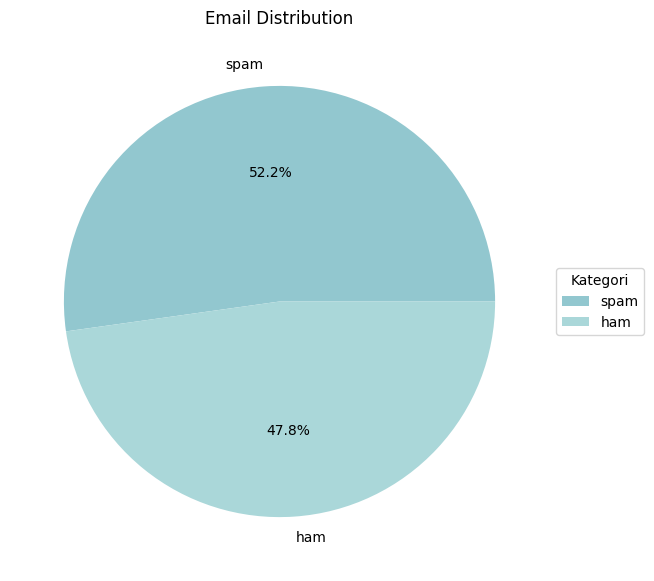

In [160]:
# Visualisasi Distribusi Data Menggunakan pie chart
label = df['Kategori'].value_counts().index

fig = plt.figure(figsize=(10, 7))
plt.pie(df['Kategori'].value_counts(), labels=label, autopct='%1.1f%%', colors=['#92C7CF','#AAD7D9','#99ff89'])
plt.title('Email Distribution')
legend = plt.legend(title='Kategori', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Chart 2 - Wordcloud

#### Kata yang Sering Muncul pada Email Spam


In [56]:
spam_data = df[df['Kategori'] == 'spam'].copy()

In [57]:
spam_data.head()

,Kategori,Pesan
0,spam,alami tak tahan identitas usaha sangat sulit i...
1,spam,fanny gunslinger dagang saham merrill muzo buk...
2,spam,rumah rumah baru luar biasa jadi mudah tunjuk ...
3,spam,4 minta khusus cetak warna informasi tambah se...
4,spam,jangan punya uang dapat cd perangkat lunak sin...


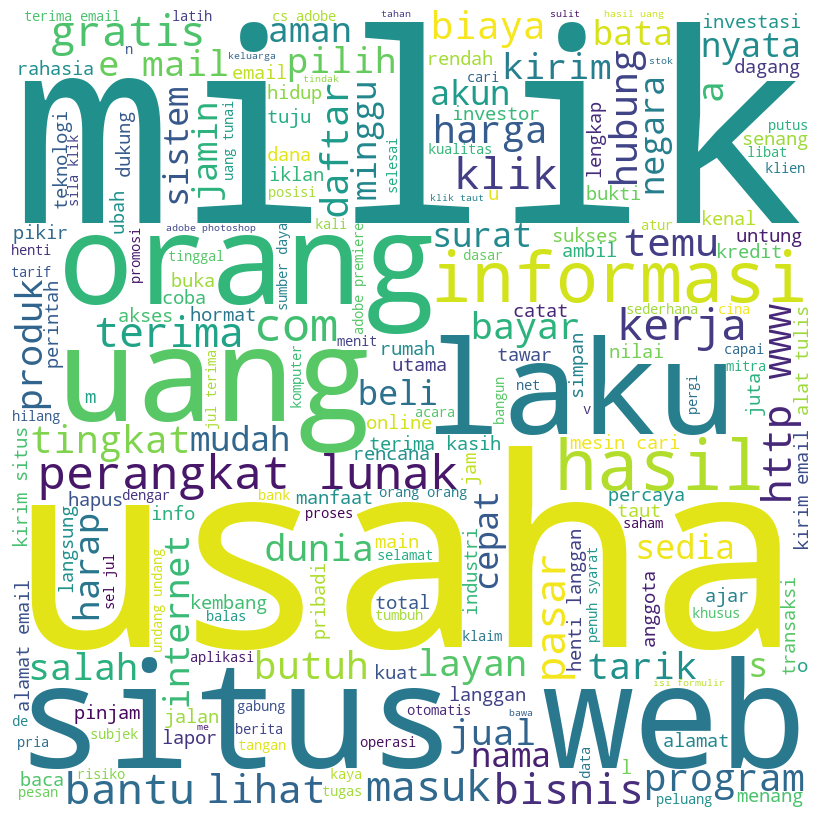

In [58]:
from wordcloud import WordCloud

stop_words = set(stopwords.words('indonesian'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(spam_data['Pesan']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Kata yang Sering Muncul pada Email Non Spam


In [59]:
non_spam_data = df[df['Kategori'] == 'ham'].copy()

In [60]:
non_spam_data.head()

,Kategori,Pesan
1368,ham,halo teman teman ganggu kuesioner isi satu hal...
1369,ham,sacramento weather station fyi terus mike a ro...
1370,ham,enron india newsdesk 18 januari newsclips vinc...
1371,ham,re powerisk 2001 undang angelika terima kasih ...
1372,ham,re database resco tangkap langgan steve krishn...


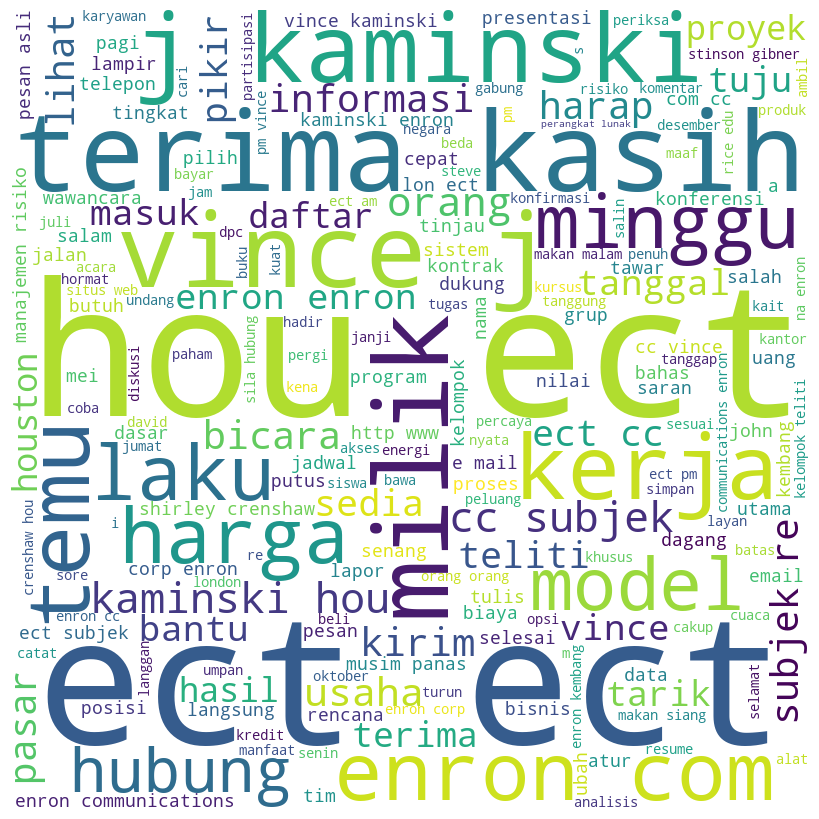

In [62]:
stop_words = set(stopwords.words('indonesian'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(non_spam_data['Pesan']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 7. Data Preparation

## Feature Engineering

### Word Frequency

In [63]:
# Menghitung berapa kali kata muncul pada dataset
from collections import Counter

def count_words(text):
    words = text.split()
    return Counter(words)

spam_words = count_words(' '.join(spam_data['Pesan']))
non_spam_words = count_words(' '.join(non_spam_data['Pesan']))

In [64]:
# Menampilkan 10 kata yang paling sering muncul pada email phishing
spam_words.most_common(10)

[('lebih', 1439),
 ('usaha', 1300),
 ('kirim', 1184),
 ('terima', 1116),
 ('com', 990),
 ('orang', 970),
 ('milik', 946),
 ('email', 939),
 ('situs', 938),
 ('1', 912)]

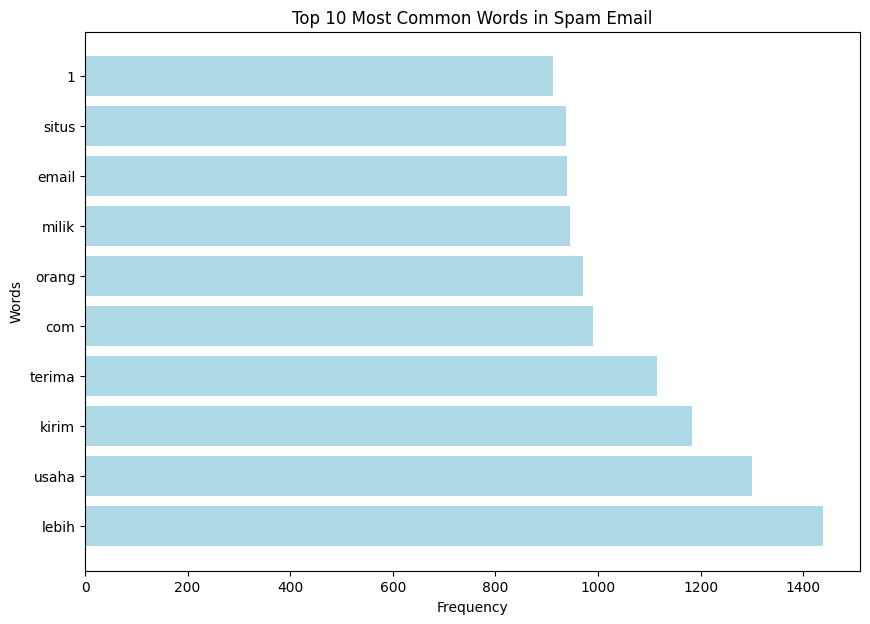

In [135]:
# Visualisasi kata yang paling sering muncul pada email phishing
plt.figure(figsize=(10, 7))
plt.barh(*zip(*spam_words.most_common(10)), color='lightblue')
plt.title('Top 10 Most Common Words in Spam Email')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [67]:
# Menampilkan 10 kata yang paling sering muncul pada email non-phishing
non_spam_words.most_common(10)

[('enron', 3458),
 ('ect', 2934),
 ('vince', 2371),
 ('hou', 1451),
 ('terima', 1445),
 ('kaminski', 1304),
 ('beri', 1213),
 ('com', 1190),
 ('subjek', 1088),
 ('kasih', 1035)]

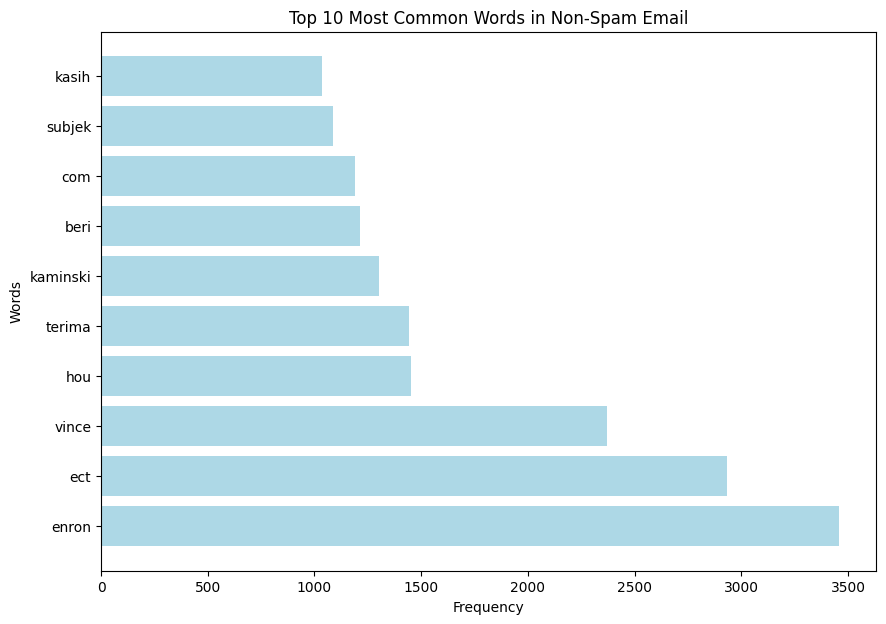

In [133]:
# Visualisasi kata yang paling sering muncul pada email non-phishing
plt.figure(figsize=(10, 7))
plt.barh(*zip(*non_spam_words.most_common(10)), color='lightblue')
plt.title('Top 10 Most Common Words in Non-Spam Email')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

### Data Transformation using TF-IDF

In [70]:
# Melakukan Transformasi Data Menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Pesan'])
y = df['Kategori']

In [71]:
# Return the feature names
feature_names = tfidf.get_feature_names_out()

# Menampilkan 10 feature names
feature_names[:10]

array(['00', '000', '0000', '000000', '00000000', '0000000000',
       '000000000005409', '000000000005413', '000000000005820',
       '000000000006452'], dtype=object)

### Data Splitting

In [72]:
# Melakukan pemisahan data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.shape[0]
test_data = X_test.shape[0]

print(f"Jumlah data training: {train_data}")
print(f"Jumlah data testing: {test_data}")
print(f"Total data: {train_data + test_data}")

Jumlah data training: 2096
Jumlah data testing: 524
Total data: 2620


# 8. Modelling

## Model Training

### 1. Support Vector Machine (SVM)

In [73]:
# Melakukan klasifikasi menggunakan Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_SVM.csv')

Akurasi: 0.9885496183206107
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       247
        spam       0.98      1.00      0.99       277

    accuracy                           0.99       524
   macro avg       0.99      0.99      0.99       524
weighted avg       0.99      0.99      0.99       524



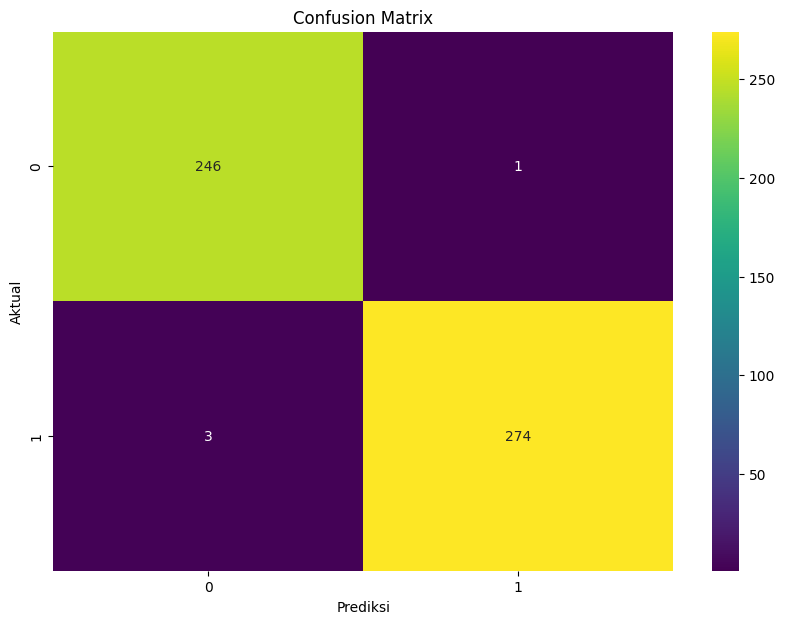

In [132]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [44]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

### 2. Decision Tree

In [75]:
# Melakukan klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_DT.csv')

Akurasi: 0.950381679389313
              precision    recall  f1-score   support

         ham       0.96      0.93      0.95       247
        spam       0.94      0.97      0.95       277

    accuracy                           0.95       524
   macro avg       0.95      0.95      0.95       524
weighted avg       0.95      0.95      0.95       524



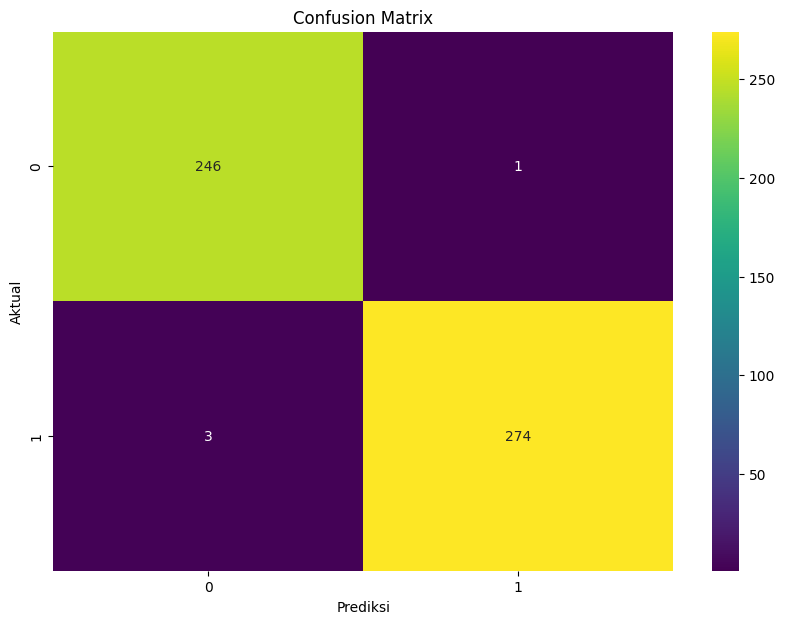

In [131]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [48]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

### 3. Naive Bayes

In [77]:
# Melakukan klasifikasi menggunakan Naive Bayes
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)
y_pred = nb.predict(X_test.toarray())

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_NB.csv')

Akurasi: 0.9446564885496184
              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       247
        spam       0.99      0.91      0.95       277

    accuracy                           0.94       524
   macro avg       0.95      0.95      0.94       524
weighted avg       0.95      0.94      0.94       524



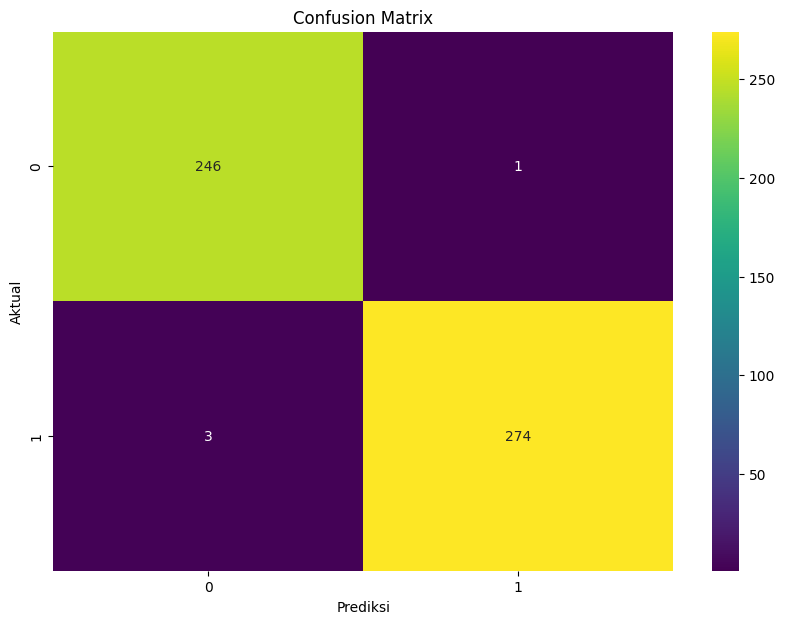

In [130]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [52]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/nb_model.pkl', 'wb') as file:
    pickle.dump(nb, file)

### 4. Neural Network

In [79]:
# Melakukan klasifikasi menggunakan Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_NN.csv')

Akurasi: 0.9923664122137404
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       247
        spam       1.00      0.99      0.99       277

    accuracy                           0.99       524
   macro avg       0.99      0.99      0.99       524
weighted avg       0.99      0.99      0.99       524



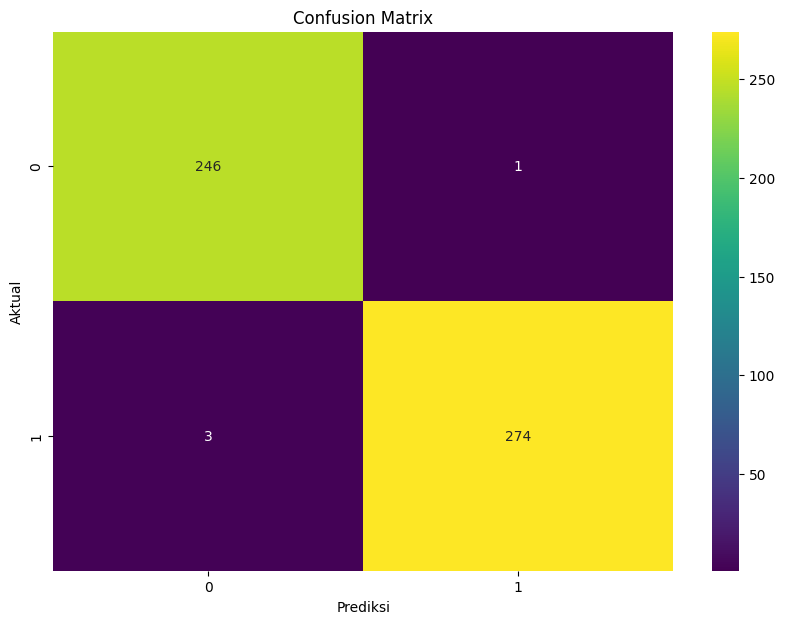

In [129]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [56]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/nn_model.pkl', 'wb') as file:
    pickle.dump(nn, file)

### 5. Komparasi Antar Model

#### Komparasi Confussion Matrix dari Setiap Model

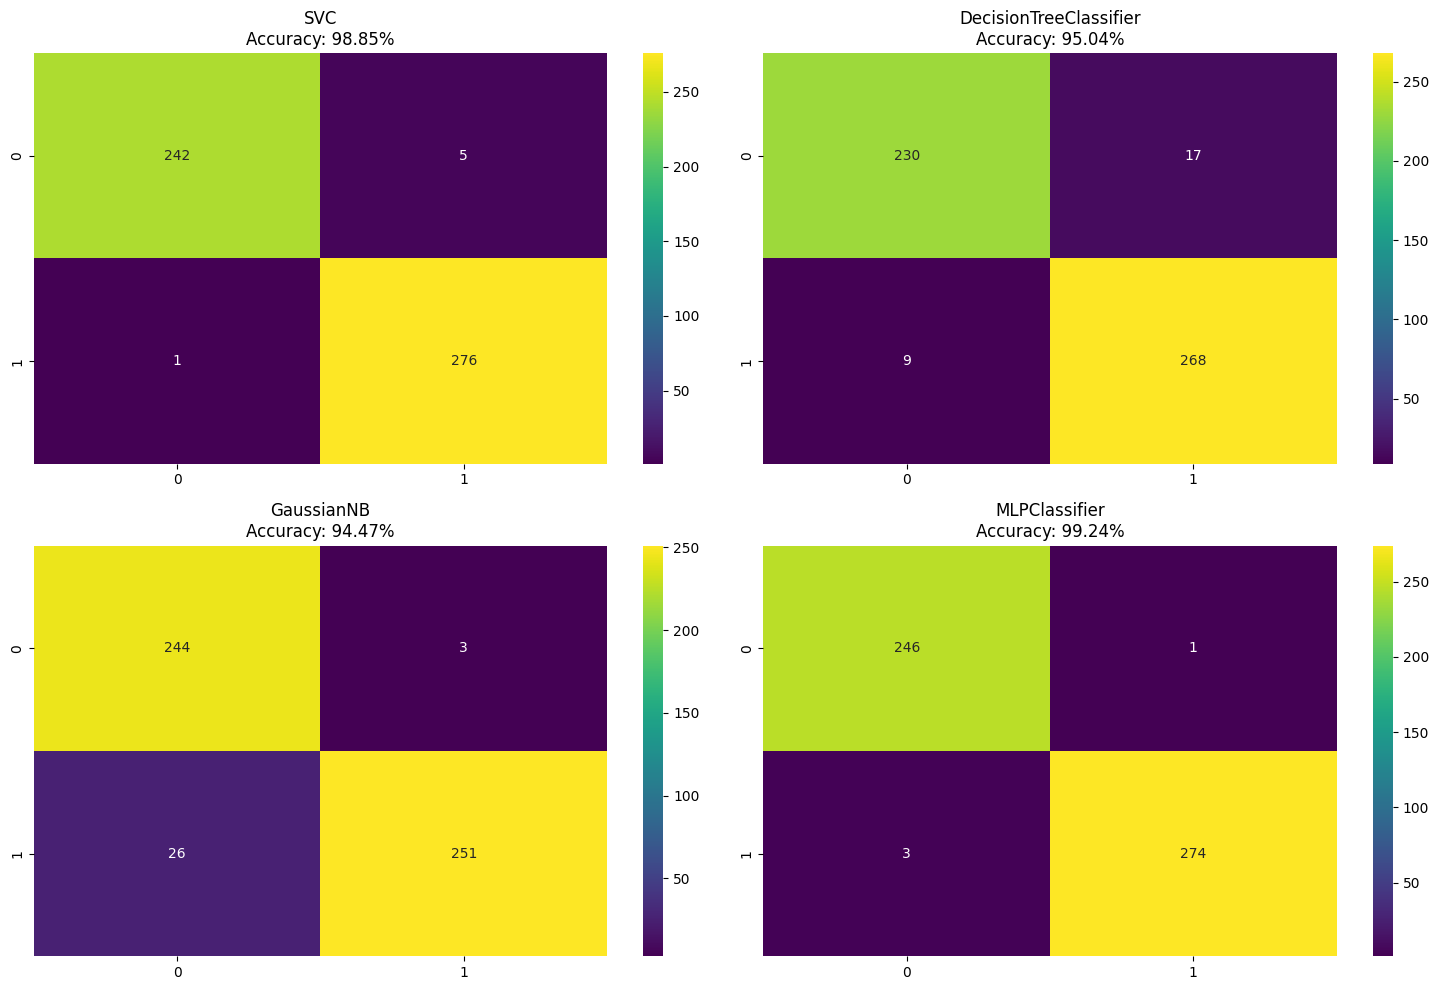

In [128]:
# Visualisasi confusion matrix untuk model SVM, DT, NB, dan NN untuk Perbandingan
def plot_confusion_matrix(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    for i, model in enumerate(models):
        y_pred = model.predict(X_test.toarray())
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=axes[i])
        accuracy = accuracy_score(y_test, y_pred)
        axes[i].set_title(f'{model.__class__.__name__}\nAccuracy: {accuracy * 100:.2f}%')
    plt.tight_layout()
    plt.show()

models = [svm, dt, nb, nn]
plot_confusion_matrix(models, X_test, y_test)

#### Komparasi Akurasi dari Setiap Model

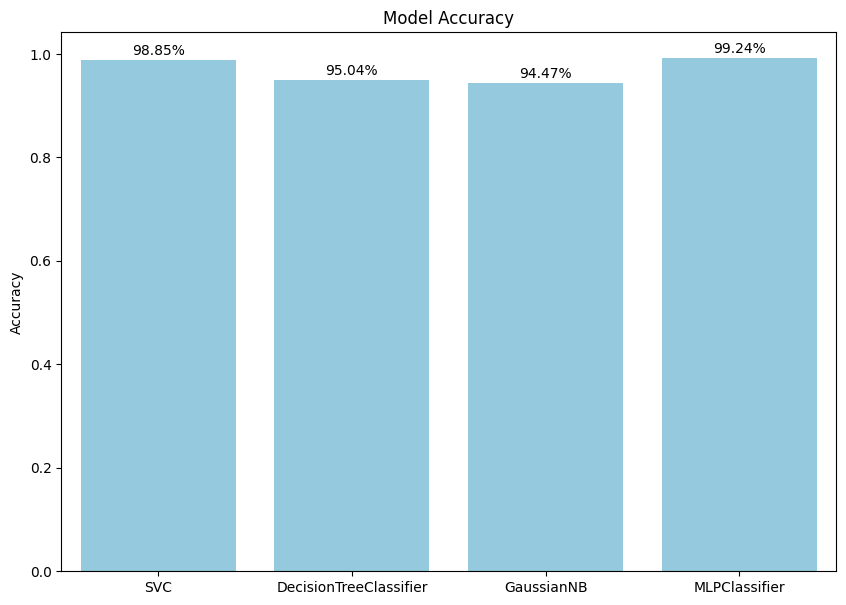

In [107]:
# Visualisasi Akurasi Model SVM, DT, NB, dan NN
def plot_accuracy(models, X_test, y_test):
    accuracy_scores = []
    for model in models:
        y_pred = model.predict(X_test.toarray())
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    plt.figure(figsize=(10, 7))
    sns.barplot(x=[model.__class__.__name__ for model in models], y=accuracy_scores, color='skyblue')
    for i, accuracy in enumerate(accuracy_scores):
        plt.text(i, accuracy + 0.01, f'{accuracy * 100:.2f}%', ha='center')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy(models, X_test, y_test)

#### Mencetak Hasil Komparasi ke File CSV

In [94]:
# Convert classification report to CSV
svm_report = classification_report(y_test, svm.predict(X_test), output_dict=True)
svm_report_df = pd.DataFrame(svm_report).transpose()

dt_report = classification_report(y_test, dt.predict(X_test), output_dict=True)
dt_report_df = pd.DataFrame(dt_report).transpose()

nb_report = classification_report(y_test, nb.predict(X_test.toarray()), output_dict=True)
nb_report_df = pd.DataFrame(nb_report).transpose()

nn_report = classification_report(y_test, nn.predict(X_test), output_dict=True)
nn_report_df = pd.DataFrame(nn_report).transpose()

final_report = pd.concat([svm_report_df, dt_report_df, nb_report_df, nn_report_df], keys=['SVM', 'DT', 'NB', 'NN'])
final_report.to_csv('./results/dataset_2/comparison.csv')

# Mengubah hasil comparision.csv menjadi 2 digit di belakang koma
final_report = pd.read_csv('./results/dataset_2/comparison.csv', index_col=[0, 1])
final_report = final_report.round(2)
final_report.to_csv('./results/dataset_1/comparison.csv')

## Prediksi Menggunakan Model

In [93]:
# Membuat Prediksi Menggunakan masing-masing Model
def predict_email(email_text, model):
    email_text = preprocess_text(email_text)
    email_text = tfidf.transform([email_text])
    if isinstance(model, GaussianNB):
        email_text = email_text.toarray()
    prediction = model.predict(email_text)
    return prediction[0]

# Contoh email ham
email_text = "Halo, apa kabar? Sudah lama tidak berjumpa. Kapan kita bisa bertemu lagi?"

svm_prediction = predict_email(email_text, svm)
dt_prediction = predict_email(email_text, dt)
nb_prediction = predict_email(email_text, nb)
nn_prediction = predict_email(email_text, nn)

print(f"Email Text: {email_text}")
print(f"SVM Prediction: {svm_prediction}")
print(f"Decision Tree Prediction: {dt_prediction}")
print(f"Naive Bayes Prediction: {nb_prediction}")
print(f"Neural Network Prediction: {nn_prediction}")

Email Text: Halo, apa kabar? Sudah lama tidak berjumpa. Kapan kita bisa bertemu lagi?
SVM Prediction: ham
Decision Tree Prediction: spam
Naive Bayes Prediction: ham
Neural Network Prediction: ham
